Вариант 5.<br> 
1. На комплексной плоскости изобразить числа:<br> 
 Z1=-i, Z2=4+3i – радиус векторами синего и красного цвета, соответственно;<br> 
 Z3=Z1+Z2 – знаком + зеленого цвета;<br> 
 Z4=Z1*Z2 – знаком * синего цвета;<br> 
 Z5=(Z1)^1/3 – знаками ^ красного цвета;<br> 
 Z6=Z2/Z1 – знаком * красного цвета.<br> 
 Проверить правильность произведенных вычислений и отображений.<br> 


[-1j, (4+3j), (4+2j), (3-4j), (0.8660254037844387-0.49999999999999994j), (-3+4j)]
-29.999999999999996
90.0
210.0


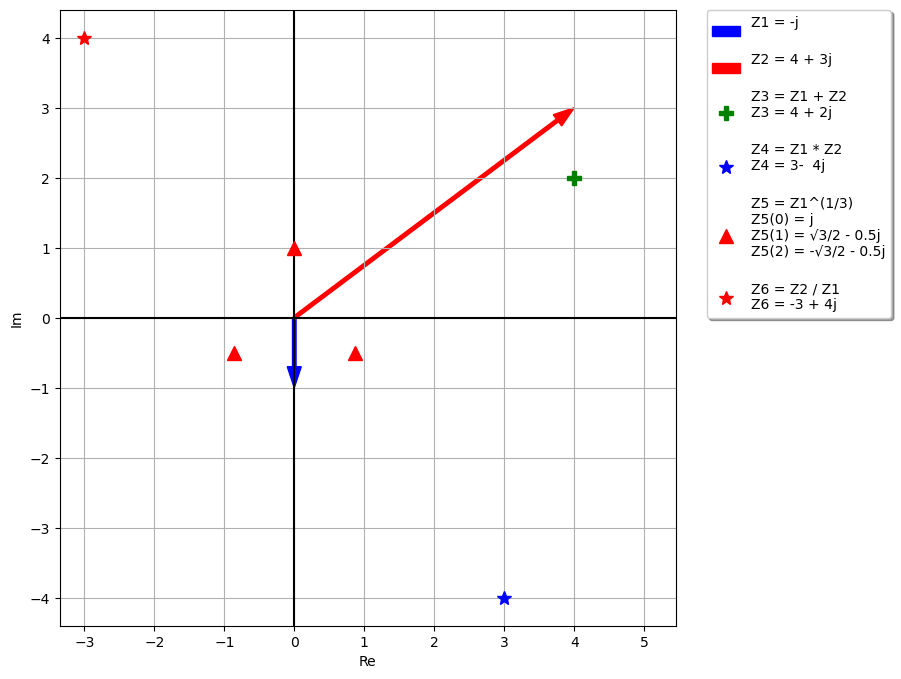

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy import signal

# Используем комплексные числа для представления чисел на комплексной плоскости
Z1 = complex(0, -1)
Z2 = complex(4, 3)
Z3 = Z1 + Z2
Z4 = Z1 * Z2
Z5 = Z1**(1/3)
Z6 = Z2 / Z1

all = [Z1, Z2, Z3, Z4, Z5, Z6]

print(all)

# Построение графика
fig, ax = plt.subplots()
plt.xlabel('Re')
plt.ylabel('Im')
fig.set_figwidth(8)
fig.set_figheight(8)
plt.axvline(x = 0, color = 'k')
plt.axhline(y = 0, color = 'k')

# Добавление Z1 и Z2
arrow1 = ax.arrow(0, 0, Z1.real, Z1.imag, head_width=0.2, head_length=0.3, width=0.05,
                  label='Z1 = -j\n', fc='blue', ec='blue', length_includes_head=True)
arrow2 = ax.arrow(0, 0, Z2.real, Z2.imag, head_width=0.2, head_length=0.3, width=0.05,
                  label='Z2 = 4 + 3j\n' ,fc='red', ec='red', length_includes_head=True)

# Добавление Z3
handle1, = plt.plot(Z3.real, Z3.imag, label="Z3 = Z1 + Z2\nZ3 = 4 + 2j\n", marker='P', 
                    markersize=10, markeredgecolor='green', markerfacecolor='green', linestyle='')

# Добавление Z4
angle = np.angle(Z4)
handle2, = plt.plot(abs(Z4)*np.cos(angle), abs(Z4)*np.sin(angle), label="Z4 = Z1 * Z2\nZ4 = 3-  4j\n", marker='*',
                    markersize=10, markeredgecolor='blue', markerfacecolor='blue', linestyle='')

# Добавление Z5
angle = np.angle(Z1**(1/3))
handle3, = plt.plot(abs(Z5)*np.cos(angle), abs(Z5)*np.sin(angle), 
                    label='Z5 = Z1^(1/3)\nZ5(0) = j\n'
                    'Z5(1) = √3/2 - 0.5j\nZ5(2) = -√3/2 - 0.5j\n', 
                    marker='^', markersize=10, markeredgecolor='red',
                    markerfacecolor='red', linestyle='')
print(np.degrees(angle))

angle = angle + 2 * np.pi / 3
print(np.degrees(angle))
plt.plot(abs(Z5)*np.cos(angle), abs(Z5)*np.sin(angle), marker='^',
                    markersize=10, markeredgecolor='red', markerfacecolor='red')

angle = angle + 2 * np.pi / 3
print(np.degrees(angle))
plt.plot(abs(Z5)*np.cos(angle), abs(Z5)*np.sin(angle), marker='^',
                    markersize=10, markeredgecolor='red', markerfacecolor='red')

# Добавление Z6
handle4, = plt.plot(Z6.real, Z6.imag, label='Z6 = Z2 / Z1\nZ6 = -3 + 4j', marker='*', 
                    markersize=10, markeredgecolor='red', markerfacecolor='red', linestyle='')

plt.legend(handles=[handle1,handle2,handle3,handle4])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0.0, shadow=True)

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

plt.axis('square')

plt.grid()

plt.show()

2. На комплексной плоскости построить множество точек, удовлетворяющих условиям:<br>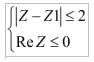

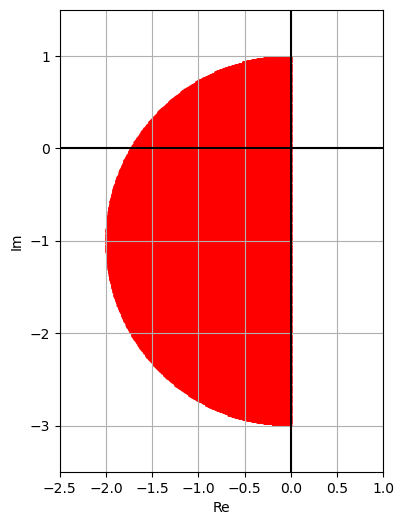

In [7]:

# Задаем границы осей
x_range = np.linspace(-2, 0, 500)
y_range = np.linspace(-4, 2, 500)

# Создаем сетку точек с помощью функции meshgrid
X, Y = np.meshgrid(x_range, y_range)

# Создаем массив комплексных чисел с помощью сетки точек
Z = X + 1j*Y

# Определяем условие на множество точек
mask = (abs(Z + 1j) <= 2) & (Z.real <= 0)

# Создаем новый массив только из точек, удовлетворяющих условию
Z_masked = np.ma.masked_where(~mask, Z)

# Графическое представление множества точек на комплексной плоскости
fig, ax = plt.subplots()
ax.scatter(Z_masked.real, Z_masked.imag, s=0.5, c='red')

plt.xlabel('Re')
plt.ylabel('Im')
fig.set_figwidth(6)
fig.set_figheight(6)
plt.axvline(x = 0, color = 'k')
plt.axhline(y = 0, color = 'k')
plt.axis('square')
plt.axis([-2.5,1,-3.5,1.5])
plt.grid()
# Отображаем рисунок
plt.show()

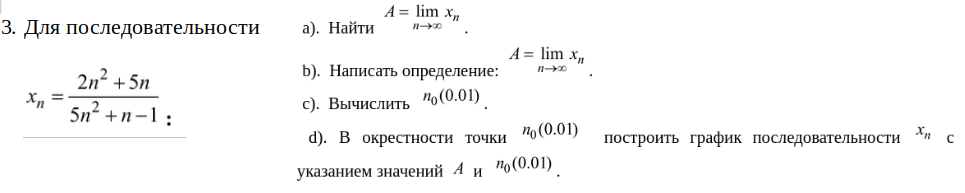

Значение предела A = 2/5
Значение n(0,01) = 92.0


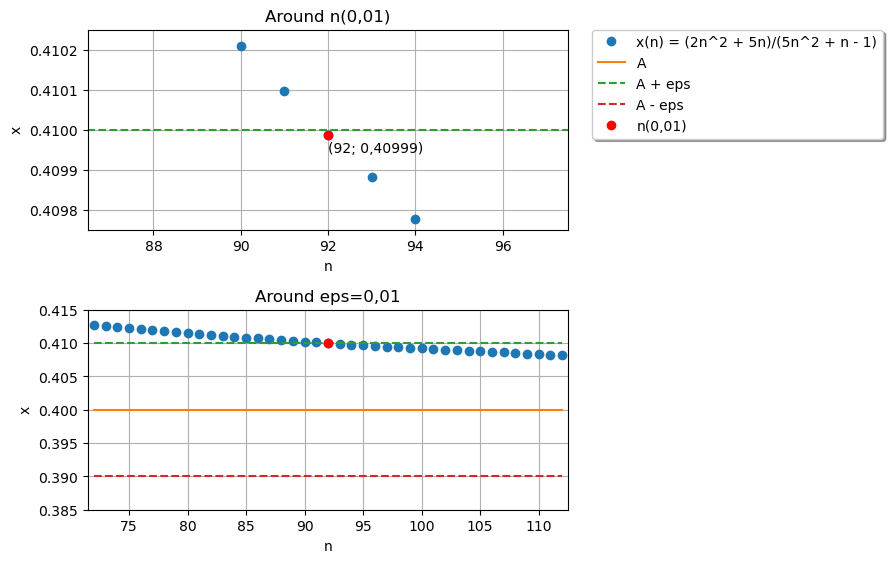

In [103]:
# подключаем необходимые библиотеки:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# задаем символьные переменные:
n = sp.symbols('n')
f = (2*n**2 + 5*n) / (5*n**2 + n - 1)

# вычисляем предел A:
A = sp.limit(f, n, sp.oo)

# выводим значение A:
print(f"Значение предела A = {A}") # A = 2/5

# вычисляем n(0.01):
eps = 0.01

a = sp.solve_univariate_inequality(sp.Abs(f - A) < eps, n, relational=False)
b = sp.solve_univariate_inequality(n > 0, n, relational=False)
interv = sp.Intersection(a, b)
n_001 = np.ceil(float(interv.args[0]))

# выводим n(0,01):
print(f"Значение n(0,01) = {n_001}") # Значение n(0,01) = 92.0

# задаем функцию последовательности:
def xn(n):
  return (2*n**2 + 5*n) / (5*n**2 + n - 1)

# создаем массив значений n:
N = 20
n_arr = np.linspace(n_001 - N, n_001 + N, 2*N + 1)

# создаем массив значений последовательности xn:
xn_arr = xn(n_arr)

# создаем массив значений A:
A_arr = np.full_like(n_arr, A)

fig, axs = plt.subplots(2)

fig.set_figwidth(6)
fig.set_figheight(6)

# строим график в окрености n(0,01):
axs[0].title.set_text('Around n(0,01)')
axs[0].plot(n_arr, xn_arr, 'o',label='x(n) = (2n^2 + 5n)/(5n^2 + n - 1)')
axs[0].plot(n_arr, A_arr, label='A')
axs[0].plot(n_arr, A_arr + eps, label='A + eps', linestyle='--')
axs[0].plot(n_arr, A_arr - eps, label='A - eps', linestyle='--')

# строим точку n(0,01)
axs[0].plot(n_001, xn(n_001), 'ro', label='n(0,01)', markersize=6)
axs[0].text(n_001, xn(n_001) - 0.000045, '(92; 0,40999)')

axs[0].axis([86.5, 97.5 , 0.40975, 0.41025])
axs[0].set_xlabel('n')
axs[0].set_ylabel('x')
axs[0].grid()

axs[0].legend()
axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0.0, shadow=True)


# строим график в окрености eps:
axs[1].title.set_text('Around eps=0,01')
axs[1].plot(n_arr, xn_arr, 'o',label='x(n) = (2n^2 + 5n)/(5n^2 + n - 1)')
axs[1].plot(n_arr, A_arr, label='A')
axs[1].plot(n_arr, A_arr + eps, label='A + eps', linestyle='--')
axs[1].plot(n_arr, A_arr - eps, label='A - eps', linestyle='--')

# строим точку n(0,01)
axs[1].plot(n_001, xn(n_001), 'ro', label='n(0,01)', markersize=6)

axs[1].axis([71.5, 112.5 , 0.385, 0.415])
axs[1].set_xlabel('n')
axs[1].set_ylabel('x')
axs[1].grid()

# расстояние между subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.show()